# Introduction

For this project,  as a data researcher for the World Health Organization. I will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, I will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

**Focusing Questions**: 
+ Has life expectancy increased over time in the six countries?
+ Has GDP increased over time in the six countries?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these countries?
+ What is the distribution of that life expectancy?

GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that will be using in this project:
- matplotlib
- pandas
- seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2. Prepare The Data


Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What countries are represented in the data?

In [3]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


There are six countries in the data, that is Chile, China, Germany, Mexico, USA, and Zimbabwe

What years are represented in the data?

In [4]:
print(df['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Data represent between 2000 and 2015.

## Step 4 Tweak The DataFrame

There is one column with long name, column `Life expectancy at birth (years)`, i'll rename it by `LEABY` for easier to code.
I'll rename Country name from `United States of America` to `USA`.

In [5]:
df.rename(columns={'Life expectancy at birth (years)':'LEABY'}, inplace=True)

In [6]:
df['Country'].replace({'United States of America' : 'USA'}, inplace=True)

Run `df.head()` to check new column name worked.

In [7]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


---

## Step 5. Bar Charts To Compare Average

To take a first high level look at datasets, i'll create a bar chart with the height of each bar correspond to maximum GDP of a country in 2000-2015

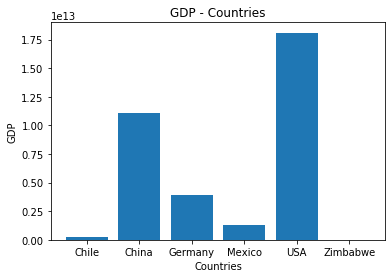

In [8]:
plt.bar(df['Country'], df['GDP'])
plt.xlabel('Countries')
plt.ylabel('GDP')
plt.title('GDP - Countries')
plt.show()

From the bar chart above, it can be seen that the United States has the highest GDP value, while Zimbabwe has the lowest GDP value

And i'll creat another bar chart with the height of each bar correspond to life expectancy value across six countries.

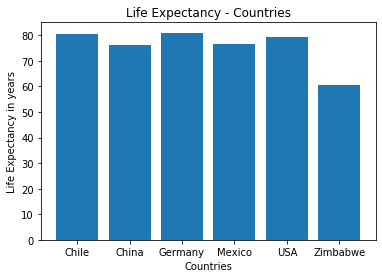

In [9]:
plt.bar(df['Country'], df['LEABY'])
plt.xlabel('Countries')
plt.ylabel('Life Expectancy in years')
plt.title('Life Expectancy - Countries')
plt.show()

From the second bar chart, Life expectancy difference for each countries is not very significant

## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

With violin plot, we can determine the distribution of the data.

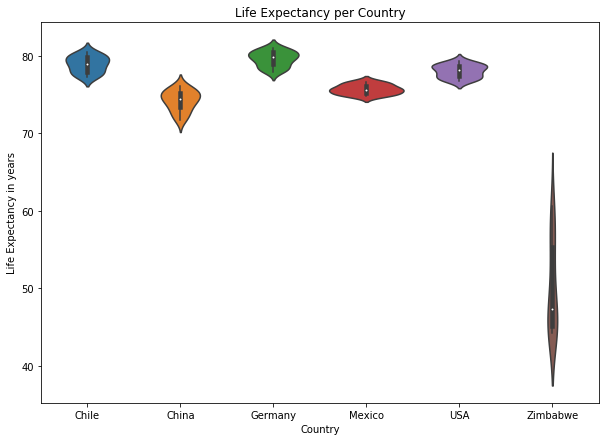

In [10]:
fig = plt.subplots(figsize=(10,7)) 
sns.violinplot(df['Country'], df['LEABY'])
plt.ylabel('Life Expectancy in years')
plt.title('Life Expectancy per Country')
plt.show()

From the figure above, Zimbabwe get a thin violin plot, which means that the value of life expectancy in Zimbabwe is very volatile.

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, we can plot the progession of GDP's over the years by country in a barplot using Seaborn.

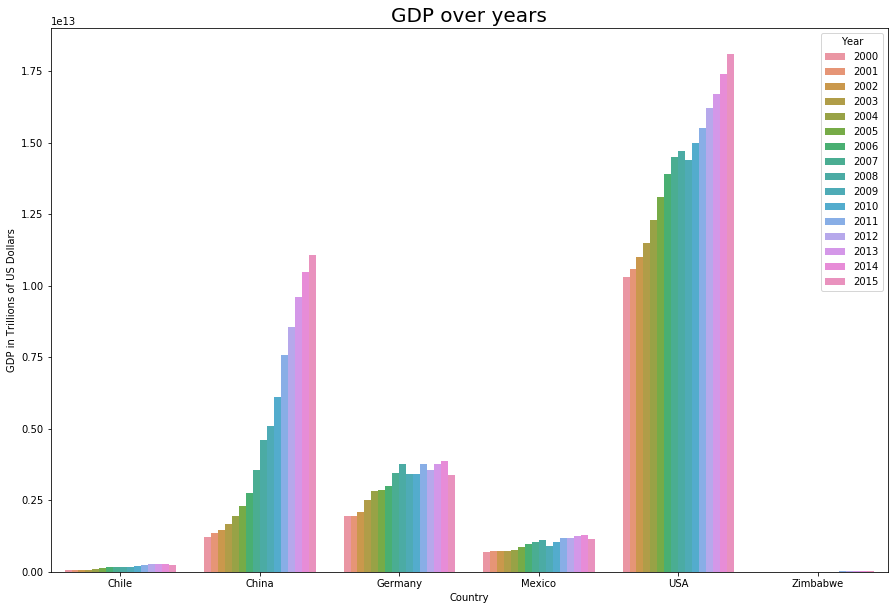

In [17]:
f, ax = plt.subplots(figsize=(15, 10)) 
ax = sns.barplot(df['Country'], df['GDP'], hue=df['Year'], data=df)
plt.ylabel('GDP in Trillions of US Dollars')
plt.title('GDP over years', fontsize=20)
plt.show()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

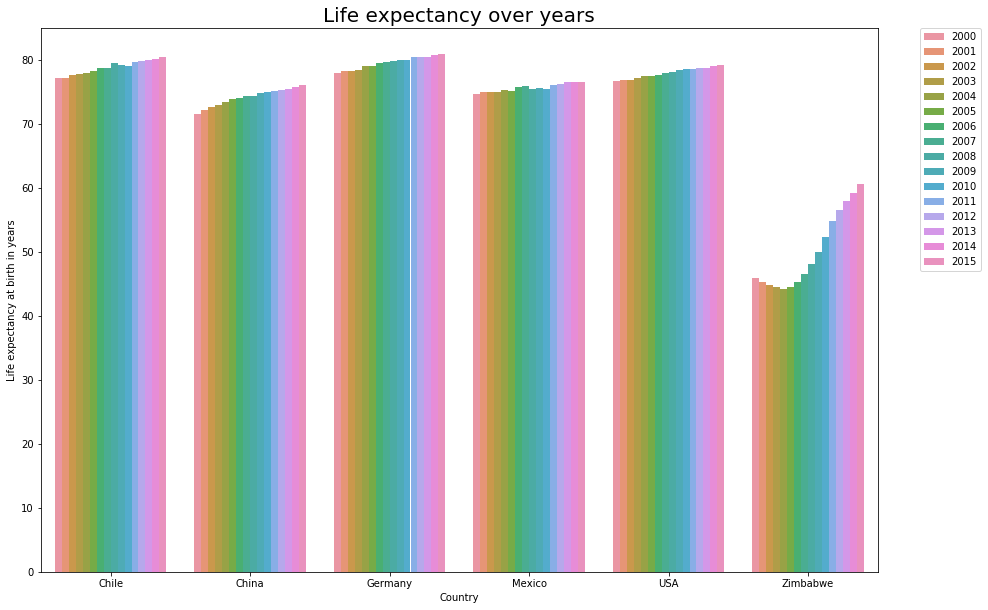

In [20]:
f, ax = plt.subplots(figsize=(15, 10)) 
ax = sns.barplot(df['Country'], df['LEABY'], hue=df['Year'], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Life expectancy at birth in years')
plt.title('Life expectancy over years', fontsize=20)
plt.show()

What are your first impressions looking at the visualized data?

- For GDP bars, China's bars changing the most than any other country.
- For LEABY bars, Zimbabwe has a significant change. 
- For most countries, biggest changes occurred in 2008, this was due to the [financial crisis of 2007-2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008#:~:text=Excessive%20risk%2Dtaking%20by%20banks,and%20an%20international%20banking%20crisis.).
- Zimbabwe had clearly the least change in GDP over years.
- With the increase in GDP each year, the value of life expectations also increases.
- For Zimbabwe's life expectancy bars, AIDS deaths contributed to the stability and reduction of HIV prevalence in Zimbabwe and remained at crisis levels in the mid-2000s. [Source.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2972436/#:~:text=KEY%20MESSAGES,the%20decline%20in%20HIV%20prevalence.)

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, we can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!

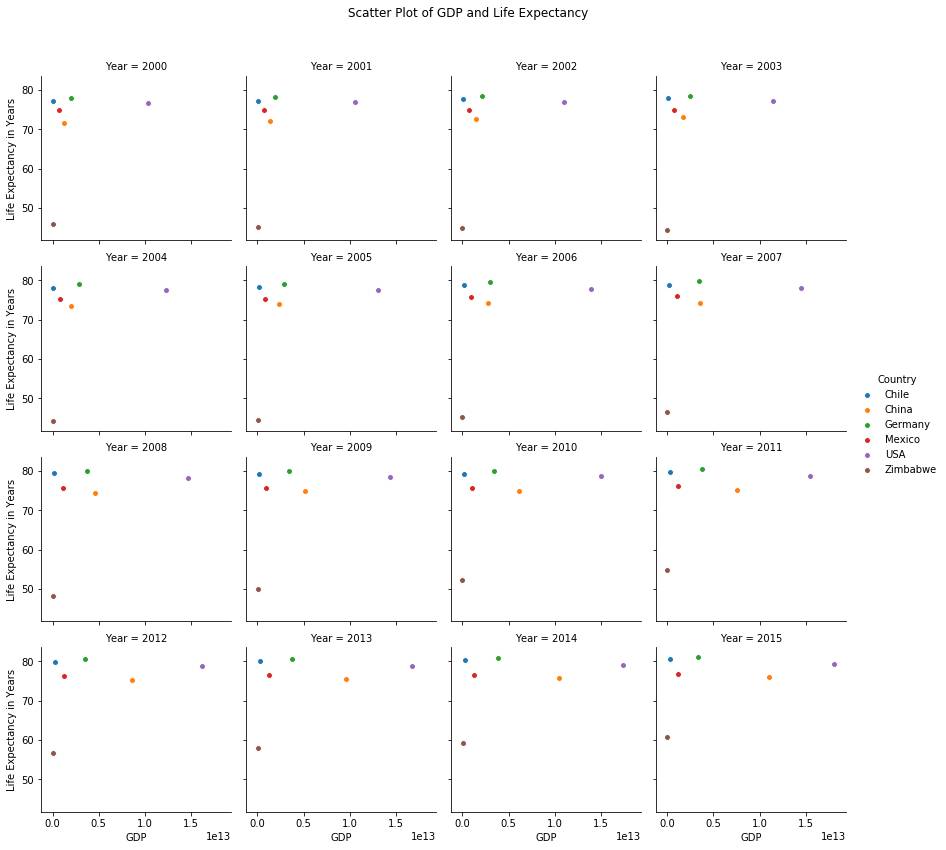

In [21]:
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, height=3)
g = (g.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend().set_axis_labels('GDP', 'Life Expectancy in Years'))
g.fig.suptitle('Scatter Plot of GDP and Life Expectancy')
plt.subplots_adjust(top=.9)

USA moves the most along the X axis. And Zimbabwe moves the most along the Y axis over the years as expected.

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country.

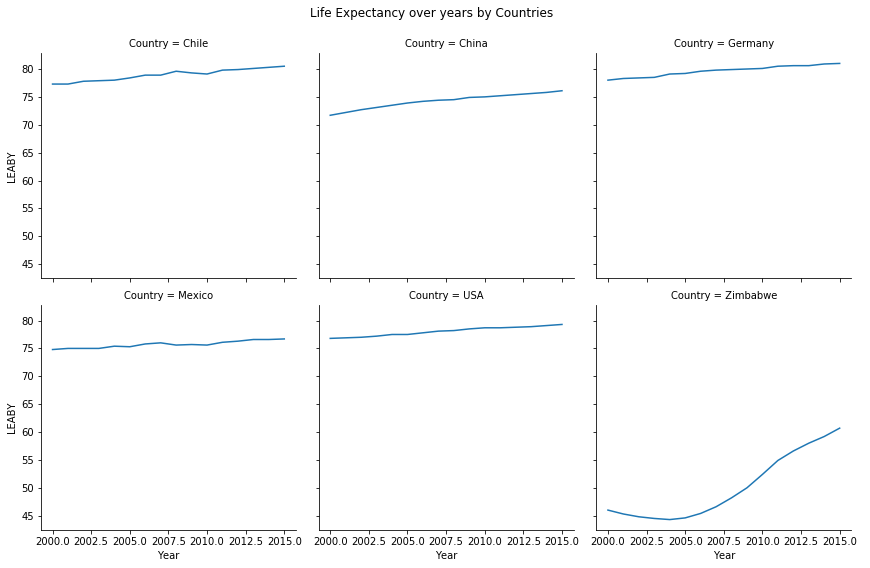

In [27]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend())
g3.fig.suptitle('Life Expectancy over years by Countries')
plt.subplots_adjust(top=.9)

- Zimbabwe's life expectancy changes the most than other countries.
- Mexico had the least change in life expectancy over time.

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now.

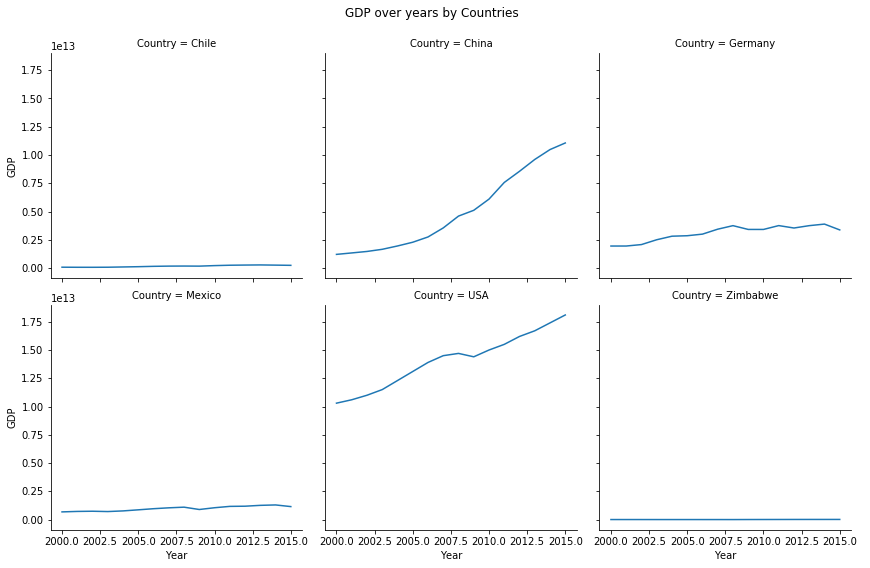

In [29]:
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, height=4)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend())
g3.fig.suptitle('GDP over years by Countries')
plt.subplots_adjust(top=.9)

+ USA has the highest GDP, and Zimbabwe has the lowest GDP.
+ In 2007-2008, in USA, China, Germany, and Mexico, GDP values has decreased due to the financial crisis.

## Step 11. Conclusion

From the results obtained, it can be concluded that the value of GDP is correlated with the value of a country's life expectations.

However, this cannot be justified, because the data used in this analysis are very small.

For further analysis results, in a [paper from Dayanikli et al.](https://smartech.gatech.edu/bitstream/handle/1853/56031/effect_of_gdp_per_capita_on_national_life_expectancy.pdf), implying that: GDP per capita affects the life expectancy of up to a certain threshold. After this was surpassed, the correlation between variables weakened significantly.